# Comparison exploration

## Library imports

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline
pd.options.mode.chained_assignment = None

## Function definitions

In [197]:
def polyfitEq(x,y):
    C= np.polyfit(x,y,1)
    m=C[0]
    b=C[1]
    return 'y = x*{} + {}'.format(m,b)
def calibrate(x,y):
    C= np.polyfit(x,y,1)
    m=C[0]
    b=C[1]
    return df_temp['Temp']*m+b


## Data Processing
Loads the Arduair and the estation data processed. and merge it in the common datetimes

In [139]:
# Read
dataArd=pd.read_csv('ARDUAIR_ACROPOLIS_PROCESADO.csv').set_index('datetime')
dataEst=pd.read_csv('ESTACION_ACROPOLIS_PROCESADO.csv').set_index('datetime')
df=pd.concat([dataArd,dataEst], join='inner', axis=1).reset_index()
df.head()

,datetime,Hum,Temp,Pr,L,pm10,pm25,o3,co,so2,Temp2,Hum2,Pr2,L2
0,2017-03-24 12:00:00,55.367257,20.938938,911.420088,302.045,0.0,0.0,0.0,0.0,0.0,25.1,79.0,681.9,784.0
1,2017-03-24 13:00:00,37.249000,34.807000,908.101900,13916.860,0.0,0.0,0.0,0.0,0.0,24.9,80.0,681.1,623.0
2,2017-03-24 14:00:00,28.104624,38.624855,908.501734,NaN,0.0,0.0,0.0,0.0,0.0,25.5,77.0,680.3,670.0
3,2017-03-24 15:00:00,27.068966,38.458046,907.855575,NaN,0.0,0.0,0.0,0.0,0.0,25.2,76.0,679.8,575.0
4,2017-03-24 16:00:00,33.055172,34.869540,907.619138,NaN,0.0,0.0,0.0,0.0,0.0,25.4,77.0,679.8,299.0


## Data plots

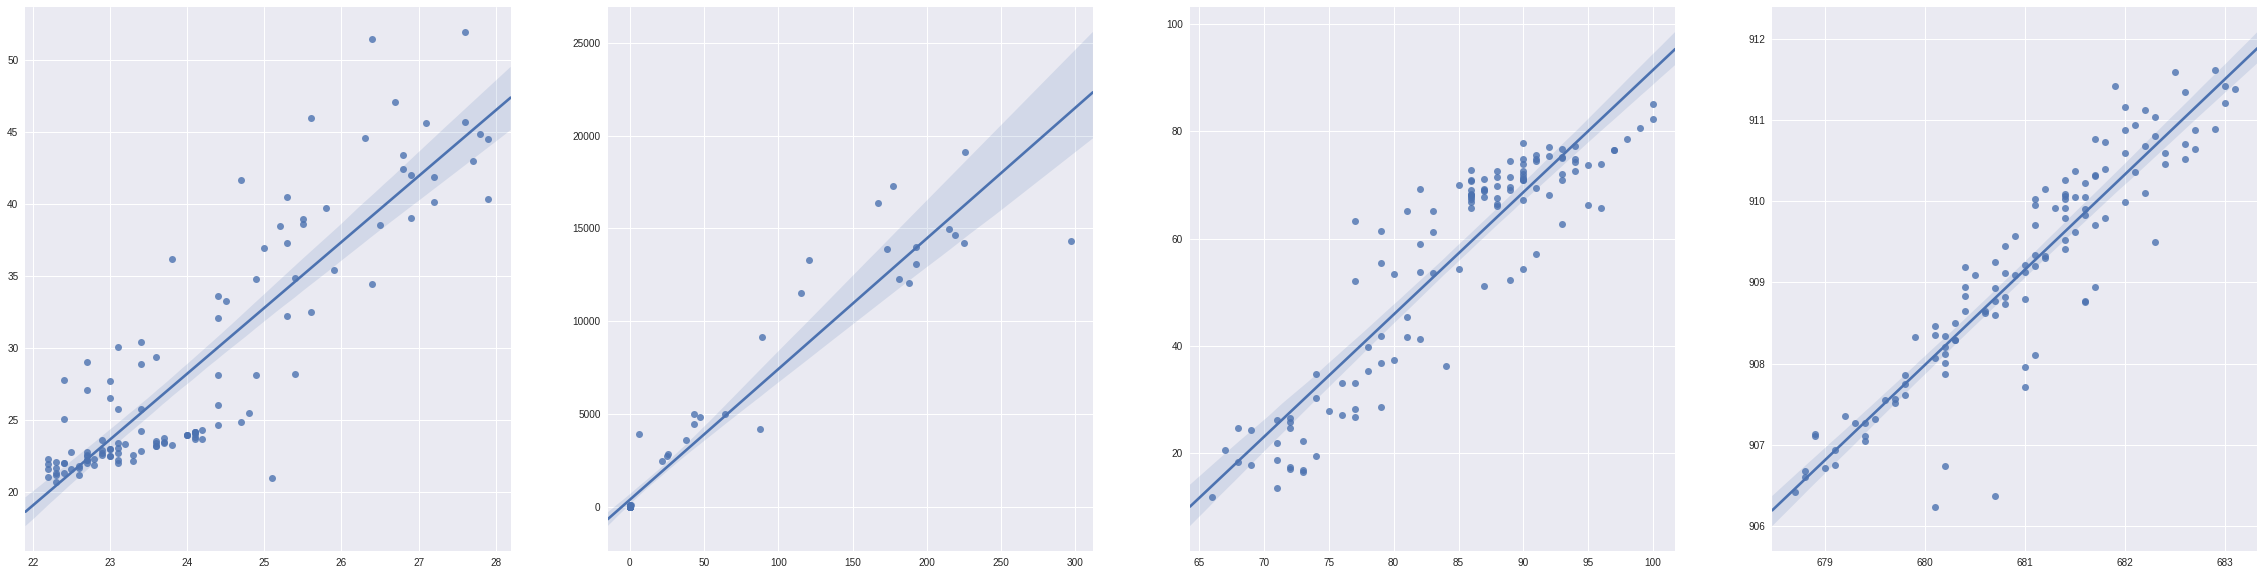

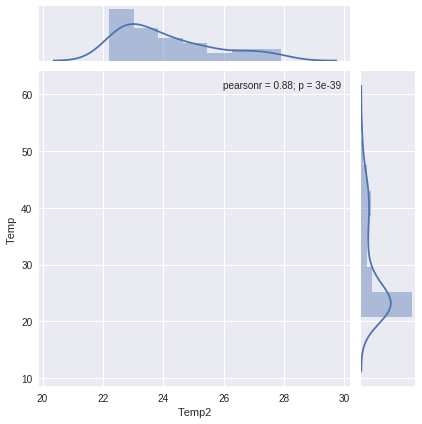

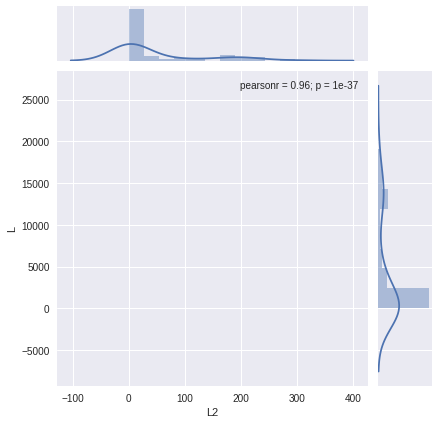

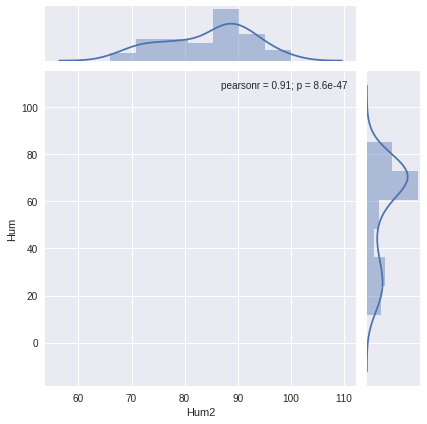

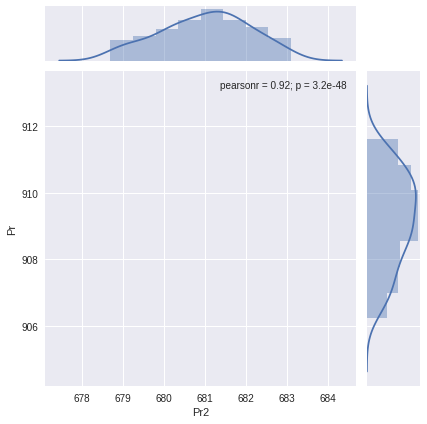

In [220]:
fig, axs = plt.subplots(1,4,figsize=(40, 10))
sns.jointplot(data=df,x='Temp2',y='Temp', kind='reg',ax=axs[0])
sns.jointplot(data=df[df.L2<600],x='L2',y='L', kind='reg',ax=axs[1])
sns.jointplot(data=df,x='Hum2',y='Hum', kind='reg',ax=axs[2])
sns.jointplot(data=df,x='Pr2',y='Pr', kind='reg',ax=axs[3])


### ¿Cuantos valores hay validos para la el parametro L?

In [145]:
df2= df[df.L2<600 ].dropna()
df2.L.count()

66

## CALIBRACION DE SENSORES

Xm+B polyfit

In [215]:
print('')
print('Temperature[C]')
print(polyfitEq(df['Temp'],df['Temp2']))
print('')
print('Humidity[%]')
print(polyfitEq(df['Hum'],df['Hum2']))
print('')
print('Pression[mb]')
print(polyfitEq(df['Pr'],df['Pr2']))
print('')
print('Radiation[mb]')
df_l=df.dropna()
print(polyfitEq(df_l['L'],df_l['L2']))


Temperature[C]
y = x*0.1688896859403192 + 19.26557634427178

Humidity[%]
y = x*0.36474405192599857 + 64.02510521599481

Pression[mb]
y = x*0.7182389783230818 + 28.010073871769578

Radiation[mb]
y = x*0.013843937431413532 + 13.660654142529303


Generate a Calibrated Dataframe

In [217]:
df_temp=df[['datetime','Temp','Temp2']]
df_temp['Temp']=calibrate(df['Temp'],df['Temp2'])
df_temp.head()

,datetime,Temp,Temp2
0,2017-03-24 12:00:00,22.801947,25.1
1,2017-03-24 13:00:00,25.144120,24.9
2,2017-03-24 14:00:00,25.788916,25.5
3,2017-03-24 15:00:00,25.760744,25.2
4,2017-03-24 16:00:00,25.154682,25.4
